In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

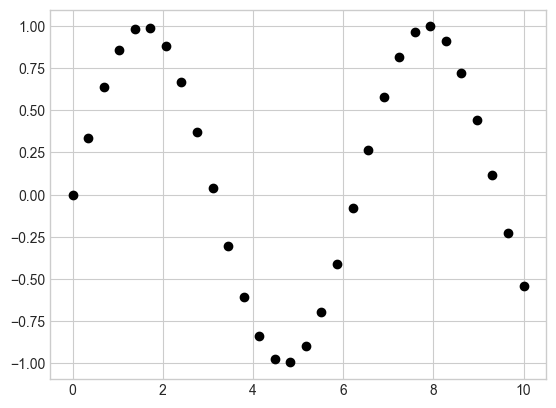

In [4]:
# 使用plt.plot 繪製散佈圖
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x,y,'o', color='black');

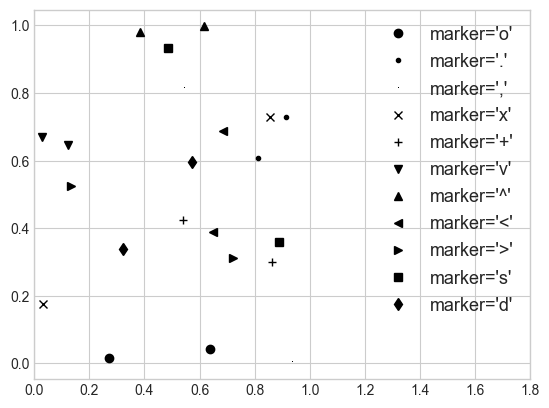

In [6]:
# 散佈圖樣式範例
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2),rng.random(2), marker, color='black',
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

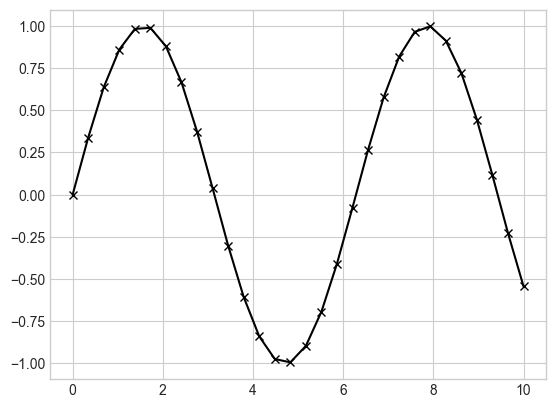

In [ ]:
# 連接散點
plt.plot(x, y, '-xk');

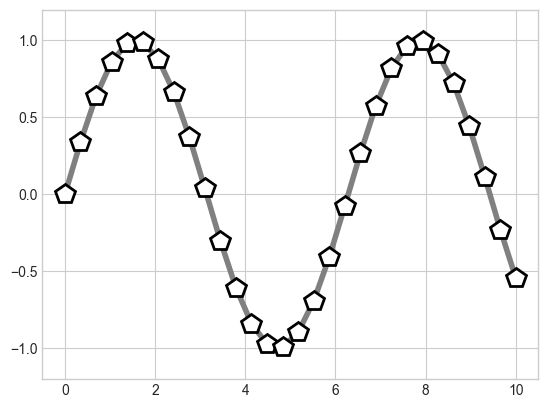

In [ ]:
# 更多設定
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

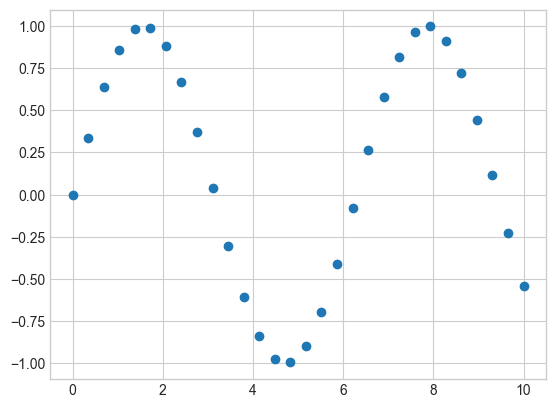

In [16]:
# plt.scatter() 語法
plt.scatter(x, y, marker='o');

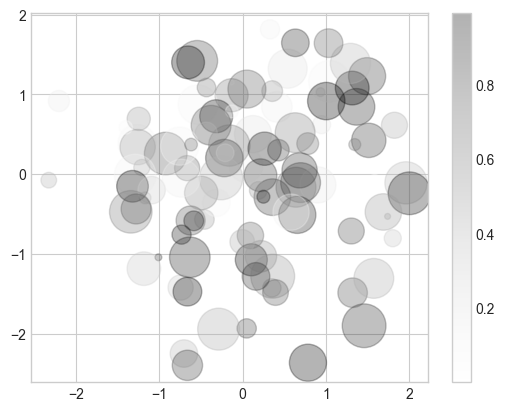

In [ ]:
# 用plt.scatter() 控制個別點的屬性的範例 (alpha 設定透明度)
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y ,c=colors, s=sizes, alpha=0.3)
plt.colorbar(); # 加入一個顏色條（colorbar）

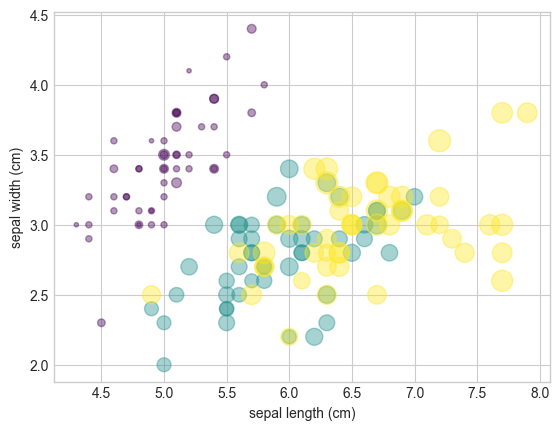

In [27]:
# 以iris 資料集為例 一次可以探索四個維度
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

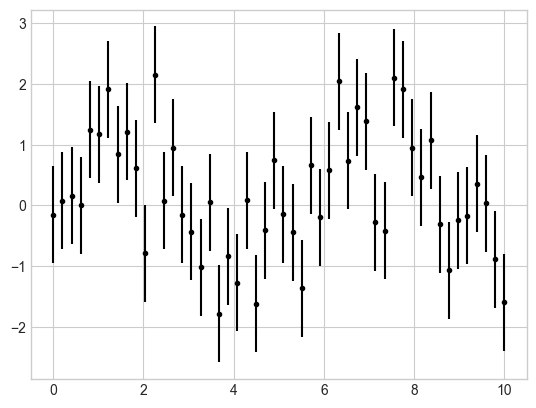

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

# 誤差棒圖的範例
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k'); #fmt 是控制線條與點外觀的格式碼

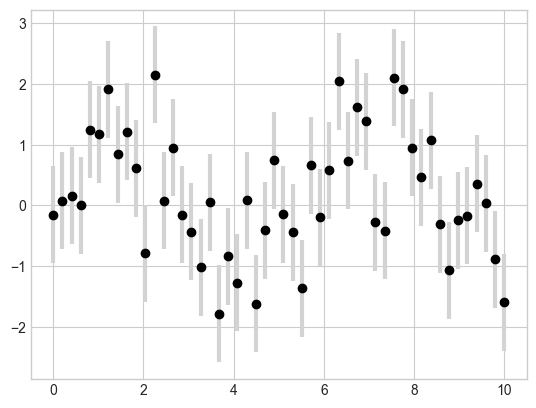

In [2]:
# 微調 error bar 的樣式
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

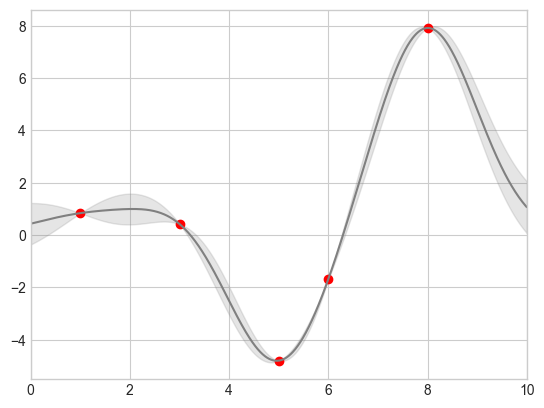

In [3]:
# 使用高斯過程回歸 將連續量測的誤差值進行視覺化
from sklearn.gaussian_process import GaussianProcessRegressor
# 定義一個model 並畫出一些資料
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 計算 GaussianProcessRegressor()
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit = gp.predict(xfit[:, np.newaxis], return_std=True)

# 使用 plt.fill_between 視覺化連續型誤差
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);